In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("housing.csv")
#df


In [213]:
#df.info()

In [214]:
#df.ocean_proximity.value_counts()

In [215]:
#df.describe()

In [216]:
#df.hist(bins=40,figsize=(11,7))

In [217]:
def shuffle_and_split_df(df,test_ratio):
  np.random.seed(40)
  random_indices=np.random.permutation(len(df))
  #half of the data we randomly choose
  #test_size=int(len(df)*0.2)
  test_size=int(len(df)*test_ratio)
  test_random_indices = random_indices[:test_size]
  train_random_indices = random_indices[test_size:]
  return df.iloc[train_random_indices],df.iloc[test_random_indices]

In [218]:
#shuffle_and_split_df(df,0.2)[0]
train_set,test_set=shuffle_and_split_df(df,0.2)

In [219]:
#train_set

In [220]:
#it tracks our data inorder to prenvent from changes
from zlib import crc32

#تبدیل میکنه به هدد ۳۲ بیتی

crc32(np.int64(10))

4108501921

In [221]:
# براساس آیدنتیفایر و ریشیو مشخص میکنیم که داخل مجموعه تست هست یا نه
def is_identifier_in_test_set(identifier,test_ratio):
  return crc32(np.int64(identifier))< test_ratio*2**32
  # ۲۰ درصد اول تبدیل رو برای هی در نظر میکیره
  # 4108501921 مثلا بیس درصد ابن عدد

In [222]:
def split_train_test_with_identifier_hash(df,test_ratio,identifier_column):
  identifiers=df[identifier_column]
  in_test_set=identifiers.apply(lambda id_: is_identifier_in_test_set(id_,test_ratio))
  return df.loc[~in_test_set],df.loc[in_test_set]


In [223]:
#index==identifier

train_set,test_set =split_train_test_with_identifier_hash(df.reset_index(),0.2,"index")

In [224]:
#df.reset_index()['index']
#train_set

In [225]:
#test_set

In [226]:
#never delete a row from between
#always add data from last one
#two way above is inevitable and might change so we better to set other column as identifier such as longtitude
df_with_identifier=df
df_with_identifier["identifier"]=df["longitude"]*1000+df["latitude"]
#we make furmola that we sure never changed like above and we set it as our identifier

In [227]:
#df_with_identifier

In [228]:
train_set,test_set =split_train_test_with_identifier_hash(df_with_identifier,0.2,"identifier")

In [229]:
#test_set
#الان حتی اگه حذف کتیم و اصافه کنیم دیتافریم مشکلی براش پیش نمیلد یا نتیجه نهایی چیزی نمیشه جون براش هش ساختیم

In [230]:
#کارهای بالا ضروری برای شروع preprocessing
#sckitlearn has many library for split and preprocessing

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
train_set,test_set = train_test_split(df,test_size=0.2,random_state=40)
 # تابع بالا کار تابع پایین رو انجام میدههه
#def shuffle_and_split_df(df,test_ratio):
  #np.random.seed(40)
  #random_indices=np.random.permutation(len(df))
  #half of the data we randomly choose
  #test_size=int(len(df)*0.2)
  #test_size=int(len(df)*test_ratio)
  #test_random_indices = random_indices[:test_size]
  #train_random_indices = random_indices[test_size:]
  #return df.iloc[train_random_indices],df.iloc[test_random_indices]


In [233]:
# کارهای بالا برای داده های خیلی بزرگ بود زمانی کخ داده ی ما کم است
#stratified sampling
# sample bias پیش میاد نسبت به یه ویژگی خاص از اون باید به اندازه هم داخل تست و هم داخل ترین داشته باشیم

In [234]:
#دسته بندی روی داده های ستونی که مقادیر پیوسته دارد
df["median_incom_categories"]=pd.cut(df["median_income"],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
       labels=[1,2,3,4,5])

<Axes: xlabel='median_incom_categories'>

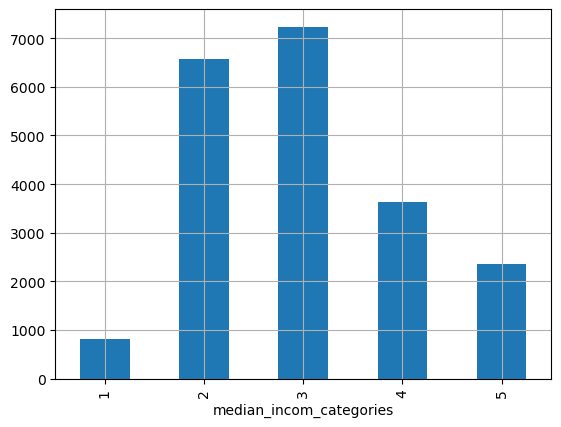

In [235]:
#df["median_income"]
df["median_incom_categories"].value_counts().sort_index().plot.bar(grid=True)

In [236]:
from sklearn.model_selection import StratifiedShuffleSplit


In [237]:
#پیاده سازی stratified sampling
sss=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=40)
stratified_split=[]
for train_index,test_index in sss.split(df,df["median_incom_categories"]):
  stratified_train_set_n= df.iloc[train_index]
  stratified_test_set_n= df.iloc[test_index]
  stratified_split.append([stratified_train_set_n,stratified_test_set_n])

In [238]:
stratified_train_set , stratified_test_set = stratified_split[0]

In [239]:
#stratified_train_set

In [240]:
stratified_train_set['median_incom_categories'].value_counts()/len(stratified_train_set)

median_incom_categories
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [241]:
stratified_test_set['median_incom_categories'].value_counts()/len(stratified_test_set)

median_incom_categories
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [242]:
#برای stratified یه جای کدهای بالا میشه با یه خط کد هم درست کرد
str_train_set,str_test_set = train_test_split(df,test_size=0.2,
                                              stratify=df["median_incom_categories"],
                                              random_state=40)


In [243]:
str_train_set['median_incom_categories'].value_counts()/len(str_train_set)

median_incom_categories
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [244]:
#ستوی مدین اینکام ستون بی خودیست به مدل نمیدیم

str_train_set=str_train_set.drop("median_incom_categories",axis=1)
str_test_set=str_test_set.drop("median_incom_categories",axis=1)


In [245]:
#str_train_set

In [246]:
#توضیحات بالا برای train test splittt تمام میشه

#visualize our data
import seaborn as sns

train = str_train_set

#sns.scatterplot(train,x="longitude",y="latitude")

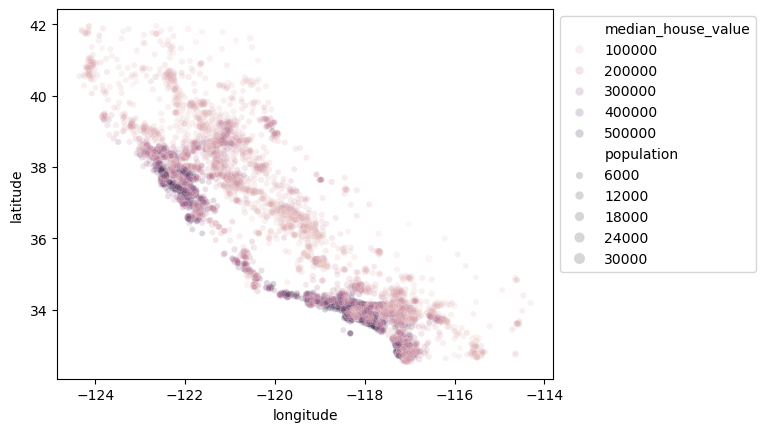

In [247]:
#متناسب کردن رنگ براساس population
#براساس سایز نقطه ها جمعیت رو مشخص میکنیم و رنگ هم داره مدین قیمت هارو مشخص میکنه
ax=sns.scatterplot(train,
                x="longitude",
                y="latitude",
                size="population",
                alpha=0.2,
                hue="median_house_value"
                )
#move legend to outside of the ax
sns.move_legend(ax,"upper left", bbox_to_anchor=(1,1))


<Axes: xlabel='median_income', ylabel='median_house_value'>

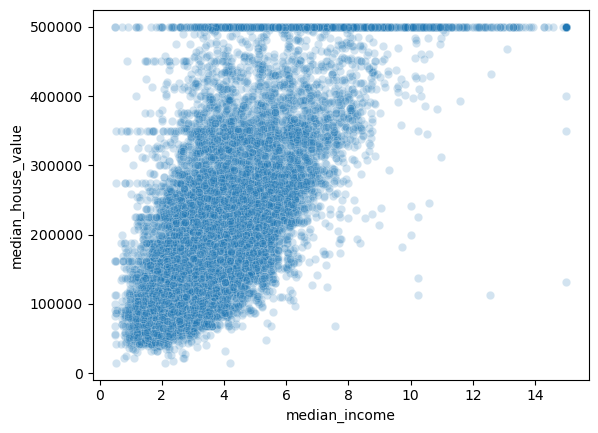

In [248]:
#correlation you can see the relationship between two value


#train.corr()["median_house_value"]

sns.scatterplot(data=train,
                x="median_income",
                y="median_house_value",
                alpha=0.2)

#نقطه هایی که روی یه خط هست رو حذف میکنیم چون مدل رو به خطا میندازه که پیش بینی رو به اون سمت ببره

#attribute/features combination


In [249]:

train["rooms_per_house"]=train["total_rooms"]/train["households"]
train["bedrooms_ratio"]=train["total_bedrooms"]/train["total_rooms"]
train["people_per_house"]=train["population"]/train["households"]

In [250]:
#train

In [251]:
 #visualization / train test split /corellation / attribute combination 

In [252]:
#آماده سازی داده برای مدل

#جدا کردن فیجر ها و تارگت ها


In [253]:

train_features = train.drop("median_house_value",axis=1)
train_target=train["median_house_value"]


In [254]:
#train_features
train_target

16415    158300.0
1279     253900.0
7741     209000.0
4425     137500.0
1283      93800.0
           ...   
1221     104000.0
12640     75400.0
5747     354700.0
16224     84600.0
8967     336000.0
Name: median_house_value, Length: 16512, dtype: float64

#Data Cleaning

In [255]:
train_features.info()

#total rooms missing and bedroom ratio value darad

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 16415 to 8967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   identifier          16512 non-null  float64
 10  rooms_per_house     16512 non-null  float64
 11  bedrooms_ratio      16344 non-null  float64
 12  people_per_house    16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [256]:
#satre hayee ke soton total_bedrooms nan hast ro drop kon
train_features.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,INLAND,-121222.12,5.000000,0.200000,2.752688
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,INLAND,-121602.15,6.246875,0.207604,3.021875
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,<1H OCEAN,-118116.05,4.483713,0.254995,2.592834
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,<1H OCEAN,-118205.93,2.719512,0.358744,3.036585
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,INLAND,-121781.98,4.400000,0.244318,2.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,INLAND,-120611.72,5.668498,0.220032,2.456044
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,INLAND,-121411.47,4.792405,0.219229,2.237975
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,<1H OCEAN,-118235.83,5.799257,0.179487,3.066914
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,INLAND,-121292.02,5.722426,0.185031,3.209559


In [257]:
total_bedrooms_median= train_features["total_bedrooms"].median()
total_bedrooms_median

436.0

#پر کردن سطر های خالی با مقادیر مدین ستون ی که مقدار خالی داردر

In [258]:
train_features["total_bedrooms"]=train_features["total_bedrooms"].fillna(total_bedrooms_median)

In [259]:
train_features["bedrooms_ratio"]=train_features["total_bedrooms"]/train_features["total_rooms"]


In [260]:
#train_features.info()


Sklearn impute

In [261]:
#simple imputer instead of dropna >>کارشون یکسان است

from sklearn.impute import SimpleImputer
#فقط روی ستون هایی اعمال میشه که مقادیرشون عددیست
simple_imputer = SimpleImputer(strategy="median")
simple_imputer

SimpleImputer(strategy='median')

In [262]:
#train_features.info()

In [263]:
train_features_numeric =train_features.select_dtypes(include=[np.number])

In [264]:
simple_imputer.fit(train_features_numeric)

SimpleImputer(strategy='median')

In [265]:
simple_imputer.statistics_
#مدین همه ستون ها رو برمیگردونه

array([-1.18480000e+02,  3.42500000e+01,  2.90000000e+01,  2.12900000e+03,
        4.36000000e+02,  1.16800000e+03,  4.11000000e+02,  3.53410000e+00,
       -1.18445990e+05,  5.22483203e+00,  2.03413719e-01,  2.82065903e+00])

In [266]:
simple_imputer.transform(train_features_numeric).shape

(16512, 12)

In [267]:
train_features_numeric=pd.DataFrame(simple_imputer.transform(train_features_numeric),
             columns=train_features_numeric.columns,
             index=train_features_numeric.index
             )

#می بینیم که در نهایت مفادیر خالی با مدین پر شد
#استفاده از ایمپیوتر بهتر از فیل نن است چون روی همه ی ستون ها انجام میده

In [268]:
#train_features_numeric

#روش های دیگ ای هم هست برای پر کردن داده ها به اصطلاح imputer

In [269]:
#ّّiterativeImputer
#وقتی تعداد داده کمتری داشته باشیم بهتر استفاده از این بالایی

#1-consistency 2-estimator 3-transformer 4-predictors 5-Inspection 6-composition

In [270]:
#categorical features
#train_features[["ocean_proximity"]].value_counts()


In [271]:
train_features_categorical=train_features[["ocean_proximity"]]

#ordinalEncoder

assign a number to the values of categorical features such as ocean proximaty
for example we assingn 1 to near ocean 2 to the island

we do this with **OrdinalEncoder**

In [272]:
#give a number to the categorical features

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
ocean_proximity_index =oe.fit_transform(train_features_categorical)

In [273]:
ocean_proximity_index

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [274]:
#train_features_categorical

In [275]:
oe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [276]:
#اختلاف بین اعداد برای مدل مهم
#اگه ترتیب داشته باشه از ordinalencoder
#اگه ترتیب نداشته باشه از oneHotEncoder

In [277]:
from sklearn.preprocessing import OneHotEncoder


In [278]:
ohe =OneHotEncoder()
ocean_proximity_ohe=ohe.fit_transform(train_features_categorical)

In [279]:
ocean_proximity_ohe.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [280]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [281]:
ohe.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [282]:
train_features_categorical_ohe =pd.DataFrame(ocean_proximity_ohe.toarray(),
             columns=ohe.get_feature_names_out())

In [283]:
#train_features_categorical_ohe

#feature scaling
#Min max scaler
داده رو بین دو بازه تقسیم میکنه
normalization

In [284]:
#اسکیل های مختلف برای مدل خوب نیست همه ی فیچر ها باید اسکیل یکسان داشته باشند. چون ایجاد اختلاف مدل رو به اشتباه میندازه

from sklearn.preprocessing import  MinMaxScaler
mns=MinMaxScaler(feature_range=(-1,1))


In [285]:
train_features_mns=mns.fit_transform(train_features_numeric)
#mns.fit_transform(train_features_numeric).min()
#mns.fit_transform(train_features_numeric).max()
#همه ی فیچر ها مفادریشون بین این دوتا عدد است
train_features_mns

array([[-0.38446215,  0.13496281,  0.60784314, ..., -0.93691343,
        -0.88348775, -0.99668387],
       [-0.46015936,  0.12858661, -0.17647059, ..., -0.91797651,
        -0.87804467, -0.99625062],
       [ 0.23505976, -0.70031881,  0.33333333, ..., -0.94475454,
        -0.84412062, -0.99694115],
       ...,
       [ 0.21115538, -0.65356004,  0.84313725, ..., -0.92477472,
        -0.89817158, -0.99617813],
       [-0.39840637,  0.15621679,  0.37254902, ..., -0.92594157,
        -0.89420346, -0.99594855],
       [ 0.18525896, -0.68969182,  0.41176471, ..., -0.9228987 ,
        -0.90626013, -0.9964474 ]])

In [286]:
mns.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'identifier', 'rooms_per_house', 'bedrooms_ratio',
       'people_per_house'], dtype=object)

In [287]:
train_features_mns =pd.DataFrame(train_features_mns,
             columns=mns.get_feature_names_out())

In [288]:
#train_features_mns


#Standardization
استاندارد کردن بازه ی اعداد بر اساس میانگین وانجراف معیار اون فیچر

In [289]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

In [290]:
#ss.fit_transform(train_features_numeric)
#ss.fit_transform(train_features_numeric).min()

#بیشتر مفادیر اظراف میانگین است

#جزر گرفتن از فیچر هایی که تیل های طولانی دارند و مفادیرشون به شدت متقارن است

رنچ رو کوچیک تر میکنیم و میشه روش استاندارد زد

log میگیریم تا توزیع رو نرمال کنیم بعد روی اون دوباره نرمال میکنیم

#log_normal distribution
توزیعات با تیل طولانی

In [291]:
#train_features_numeric["total_rooms"].hist(bins=30)


In [292]:
#train_features_numeric["total_rooms"].apply(np.log).hist(bins=30)
#بهتر شد

#multimodal distribution
تیل سنگین ندارن بالا پایین دارند

In [293]:
from sklearn.metrics.pairwise import rbf_kernel

In [294]:
#similarity measure
rbf_kernel(train_features_numeric[["housing_median_age"]],[[35]],gamma=0.1)

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]])

In [295]:
#*************
#fig,ax=plt.subplots()
#ax.hist(train_features_numeric["housing_median_age"],bins=30)
housing_age=np.linspace(train_features_numeric["housing_median_age"].min(),
                       train_features_numeric["housing_median_age"].max(),1000).reshape(-1,1)
rbf1=rbf_kernel(housing_age,[[35]],gamma=0.1)
ax2=ax.twinx()
#ax2.plot(housing_age,rbf1 , color="black",lw=2)

#ما هر ترنسفورمیشنی رو که انجام میدیم باید اینورسش رو هم بدونیم مثلا لوگ میگیریم مدل میاد لوگاریتم رو پیش بینی میکنه ک باید اینجوری نباشه

In [296]:
from sklearn.linear_model import LinearRegression

#train_features_numeric
train_target.to_frame()


,median_house_value
16415,158300.0
1279,253900.0
7741,209000.0
4425,137500.0
1283,93800.0
...,...
1221,104000.0
12640,75400.0
5747,354700.0
16224,84600.0


In [297]:
ss = StandardScaler()
target_values =ss.fit_transform(train_target.to_frame())


In [298]:
model =LinearRegression()
model.fit(train_features_numeric[["median_income"]],target_values)

LinearRegression()

In [299]:
predictions=model.predict(train_features_numeric[["median_income"]].iloc[:5])

In [300]:
predictions

array([[-0.25351323],
       [ 0.2127901 ],
       [-0.39285324],
       [-0.81837677],
       [-0.59272859]])

In [301]:
ss.inverse_transform(predictions)

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

In [302]:
#راه بهترر نسبت به بالایی

from sklearn.compose import TransformedTargetRegressor

TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())

TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=StandardScaler())

In [303]:
model.fit(train_features_numeric[["median_income"]],train_target.to_frame())

LinearRegression()

In [304]:
model.predict(train_features_numeric[["median_income"]].iloc[:5])

array([[177436.32912486],
       [231100.4887263 ],
       [161400.49038824],
       [112429.4417594 ],
       [138397.98914116]])

#Custome transformer
سفارشی شده

In [305]:
from sklearn.preprocessing import  FunctionTransformer
#اینو خودمون طراحی کردیم
# نکته : ما اینورس تارگت رو همیشه میخوایم داده ی اولیه و داده ی نهایی میشه همون اینورس مفداری که تغییر نکرد
#گاهی هم ممکن نداشته باشند ولی تارگت مهمولا داره
logarithmic_transformer=FunctionTransformer(np.log, inverse_func= np.exp)
logarithmic_transformer.transform(train_features_numeric[["population"]])

,population
16415,5.545177
1279,6.874198
7741,7.372746
4425,5.517453
1283,4.615121
...,...
1221,7.201171
12640,6.784457
5747,6.715383
16224,7.465083


In [306]:
#*************
rbf_transformer=FunctionTransformer(rbf_kernel,
                    kw_args={"Y":[[35]],"gamma":0.1})

In [307]:
rbf_transformer.transform(train_features_numeric[["housing_median_age"]])

array([[7.44658307e-03],
       [4.57533877e-08],
       [1.00000000e+00],
       ...,
       [4.57533877e-08],
       [9.04837418e-01],
       [6.70320046e-01]])

#تمرین بعدا بهش میرسی

In [308]:
#استفاده از تابع روی چندتا ستون
# نکات تکمیلی در function transformer
#*************
#rbf_transformer=FunctionTransformer(rbf_kernel,
 #                   kw_args={"X":[[33]],"Y":[[122]],"gamma":0.1})
#rbf_transformer.transform(train_features_numeric[["longitude"]],train_features_numeric[["latitude"]])



In [309]:
#duck typing
#ساخت estimator
class CustomStandardScaler:
    def fit(self,X,y=None):
      self.mean_of_X= X.mean(axis=0)
      self.std_of_X=X.std(axis=0)
      self.n_features_in_=X.shape[1]
      return self
    def transform(self,X):
      assert self.n_features_in_==X.shape[1]
      X=X-self.mean_of_X
      return X /self.std_of_X



In [310]:
from sklearn.utils.validation import check_array,check_is_fitted
from sklearn.base import BaseEstimator ,TransformerMixin

In [311]:
#check_array چک میکنه مفادیر فلوت هستن یا نه
#check_is_fitted چک میکنهه آيا متد فیت اجرا شده یا نه
#class CustomStandardScaler(TransformerMixin):
#ارث بری میکنه و از همه ی متد هاش میتونه استفاده کنهTransformerMixin از کلاس

class CustomStandardScaler(BaseEstimator,TransformerMixin):

    def __init(self,hp=0):
      self.hp=hp

    def fit(self,X,y=None):
      X=check_array(X)
      self.mean_of_X= X.mean(axis=0)
      self.std_of_X=X.std(axis=0)
      self.n_features_in_=X.shape[1]
      return self
    def transform(self,X):
      check_is_fitted(self)
      assert self.n_features_in_==X.shape[1]
      X=X-self.mean_of_X
      return X /self.std_of_X

In [312]:
css=CustomStandardScaler()
#css.fit(train_features_numeric)
#css.transform(train_features_numeric)
#به جای دوتای بالا
css.fit_transform(train_features_numeric)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,identifier,rooms_per_house,bedrooms_ratio,people_per_house
16415,-0.847903,1.060690,1.065006,-1.003811,-1.068653,-1.039117,-1.076980,-0.369087,-0.847609,-0.179382,-0.210670,-0.028453
1279,-1.037703,1.046606,-0.526863,-0.292922,-0.292301,-0.406831,-0.475183,0.309799,-1.037612,0.365122,-0.096095,-0.003756
7741,0.705462,-0.784282,0.507852,0.056499,0.399665,0.148977,0.304237,-0.571951,0.705322,-0.404841,0.617994,-0.043119
4425,0.660509,-0.727947,-0.128896,-1.115959,-1.099996,-1.045343,-1.106142,-1.191467,0.660385,-1.175258,2.181309,-0.002407
1283,-1.127609,1.126414,1.383380,-1.137740,-1.189204,-1.176958,-1.217487,-0.862948,-1.127521,-0.441398,0.457122,-0.049343
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-0.543224,1.248474,-0.606457,0.214989,0.349033,-0.074235,0.123963,-0.914614,-0.542430,0.112548,0.091179,-0.055669
12640,-0.942803,1.365838,0.428258,-0.342044,-0.292301,-0.480642,-0.276351,-0.898940,-0.942278,-0.270037,0.079071,-0.075676
5747,0.645525,-0.681001,1.542567,-0.496364,-0.617790,-0.533110,-0.610388,0.865775,0.645436,0.169649,-0.519760,0.000376
16224,-0.882866,1.107636,0.587445,0.223331,0.095875,0.285928,0.118661,-0.215726,-0.882557,0.136098,-0.436232,0.013463


#pipeline

In [313]:
#پروسه ترنسفورمیشن هایی که دارم رو همه رو پشت هم و مرتب با پایپ لاین انجام میدیم
#کد رو مرتب و شسته رفته تر میکنه

In [314]:
from sklearn.pipeline import  Pipeline,make_pipeline

numerical_features_pipeline=Pipeline([
    ("medianImputer",SimpleImputer(strategy="median")),
    ("minMaxScaler",MinMaxScaler())
])

In [315]:
# کار سه تا خط بالا رو میکنه
#make_pipeline(
 #   SimpleImputer(strategy="median"),
  #  MinMaxScaler()
#)

In [316]:
numerical_features_pipeline.fit_transform(train_features_numeric)

array([[0.30776892, 0.5674814 , 0.80392157, ..., 0.03154328, 0.05825613,
        0.00165807],
       [0.26992032, 0.5642933 , 0.41176471, ..., 0.04101175, 0.06097767,
        0.00187469],
       [0.61752988, 0.1498406 , 0.66666667, ..., 0.02762273, 0.07793969,
        0.00152942],
       ...,
       [0.60557769, 0.17321998, 0.92156863, ..., 0.03761264, 0.05091421,
        0.00191094],
       [0.30079681, 0.5781084 , 0.68627451, ..., 0.03702921, 0.05289827,
        0.00202573],
       [0.59262948, 0.15515409, 0.70588235, ..., 0.03855065, 0.04686993,
        0.0017763 ]])

In [317]:
#___________________________________________  از اینجا به بعد خیلی ممهم_______________________________________________
from sklearn.compose import  ColumnTransformer

In [318]:
#list(train_features.columns)

In [319]:
numerical_features=list(train_features.columns)
numerical_features.remove("ocean_proximity")
#numerical_features

In [320]:
categorical_features=["ocean_proximity"]

In [321]:

categorical_features_pipeline=Pipeline([
    ("mfImputer",SimpleImputer(strategy="most_frequent")),
    ("ohe",OneHotEncoder())
  #mf=most frequent
])

In [322]:
numerical_features_pipeline=Pipeline([
    ("medianImputer",SimpleImputer(strategy="median")),
    ("minMaxScaler",MinMaxScaler())
])

In [323]:
total_transformation=ColumnTransformer([
    ("numerical",numerical_features_pipeline,numerical_features),
    ("categorical",categorical_features_pipeline,categorical_features)
])

In [324]:
#"drop"
#"passthrough"یک سری ستون هارو نمیخوام تغییر کنه

In [325]:
#total_transformation.fit_transform(train_features)

In [326]:
#total_transformation.get_feature_names_out()

In [327]:
#________________________________________________________________________________

In [328]:
#all of the transformation soooooooooo important and easyyyyyyy

In [329]:

train_data,test_data = train_test_split(df,
                                          test_size=0.2,
                                          stratify=df["median_incom_categories"],
                                          random_state=40)


In [330]:
#train_data

In [331]:
train_data =train_data.drop(columns="median_incom_categories")

In [332]:
test_data =test_data.drop(columns="median_incom_categories")
#train_data

In [333]:
train_features = train_data.drop(columns="median_house_value")


In [334]:
train_target=train_data["median_house_value"]

In [335]:
test_features = test_data.drop(columns="median_house_value")
test_target=test_data["median_house_value"]

In [336]:
#make pipeline دیگ نیازی نیست اسم بزاریم برای توابع
heavy_tail_pipeline =make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log ,feature_names_out="one-to-one"),
    StandardScaler()
)

In [337]:
categorical_features_pipeline=Pipeline([
    ("mfImputer",SimpleImputer(strategy="most_frequent")),
    ("ohe",OneHotEncoder())
  #mf=most frequent
])

In [338]:
housing_median_age_rbf_transformer=FunctionTransformer(rbf_kernel,
                                                       feature_names_out="one-to-one",
                                                       kw_args={"Y":[[35]],"gamma":0.1})

In [339]:
default_numerical_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [340]:
def ratio_of_columns(X):
    return X[:,[0]]/ X[:,[1]]
def ratio_of_columns_name(function_transformer ,feature_names_in):
    return ["ratio"]

def ratio_of_columns_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(ratio_of_columns,
                        feature_names_out= ratio_of_columns_name),
        StandardScaler()
)

In [341]:
all_transformations = ColumnTransformer([
    ("bedrooms",ratio_of_columns_pipeline(),["total_bedrooms","total_rooms"]),
    ("rooms_per_house",ratio_of_columns_pipeline(),["total_rooms","households"]),
    ("people_per_house",ratio_of_columns_pipeline(),["population" , "households"]),
    ("log", heavy_tail_pipeline , ["total_rooms","total_bedrooms","population","median_income"]),
    ("rbf",housing_median_age_rbf_transformer,["housing_median_age"]),
    ("cat",categorical_features_pipeline,["ocean_proximity"])
    
],remainder = default_numerical_pipeline)
                                        
                                       
                                

In [342]:
train_features_transformed= all_transformations.fit_transform(train_features)


In [343]:
#train_features

In [344]:
train_features_transformed.shape

(16512, 16)

In [345]:
all_transformations.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_rooms',
       'log__total_bedrooms', 'log__population', 'log__median_income',
       'rbf__housing_median_age', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__identifier'], dtype=object)

In [346]:
all_transformations

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_of_columns_name at 0x000001AF0C16C0E0>,
                                                                      func=<funct...
                                 ['total_rooms', 'total_bedrooms', 'population',
                                  'median_income']),
                                ('rbf',
                                 FunctionTransformer(feature_names_out='one-to-one',
                                                     func=<function rbf_kernel at 0x000001AF039B6660>,
                                                     kw_args={'Y': [[35]],
                                                              'gamma': 0.1}),
                                 ['housing_median_age']),
                                ('cat',
                                 Pipeline(steps=[('mfImputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe', OneHotEncoder())]),
                                 ['ocean_proximity'])])

In [347]:
train_features_transformed

array([[-2.10670105e-01, -1.79381511e-01, -2.84533255e-02, ...,
        -8.47903024e-01,  1.06069020e+00, -8.47609286e-01],
       [-9.60951107e-02,  3.65121948e-01, -3.75641043e-03, ...,
        -1.03770326e+00,  1.04660645e+00, -1.03761163e+00],
       [ 6.17994355e-01, -4.04841051e-01, -4.31193773e-02, ...,
         7.05462097e-01, -7.84281723e-01,  7.05322309e-01],
       ...,
       [-5.19759731e-01,  1.69649412e-01,  3.75800155e-04, ...,
         6.45525179e-01, -6.81000852e-01,  6.45436296e-01],
       [-4.36232057e-01,  1.36098158e-01,  1.34628996e-02, ...,
        -8.82866226e-01,  1.10763605e+00, -8.82556959e-01],
       [-6.90020966e-01,  2.23591409e-01, -1.49734229e-02, ...,
         5.80593518e-01, -7.60808797e-01,  5.80355630e-01]])

In [348]:
#choosimg model from scikit-learn

In [349]:
#simpelest one (linearRegression)
#fit /predict /score three important methods

from sklearn.linear_model import LinearRegression

In [350]:
linear_regression_pipeline = make_pipeline(all_transformations,
                                           LinearRegression())

In [351]:
linear_regression_pipeline.fit(train_features ,train_target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_...
                                                   'population',
                                                   'median_income']),
                                                 ('rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x000001AF039B6660>,
                                                                      kw_args={'Y': [[35]],
                                                                               'gamma': 0.1}),
                                                  ['housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('mfImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [352]:
linear_regression_pipeline.predict(train_features).shape
linear_regression_pipeline.predict(train_features)

array([149062.46875, 212998.46875, 206054.46875, ..., 278950.46875,
       140742.46875, 290310.46875])

In [353]:
house_value_prediction =linear_regression_pipeline.predict(train_features)

In [354]:
train_target.values

array([158300., 253900., 209000., ..., 354700.,  84600., 336000.])

In [355]:
#train_target

In [356]:
house_value_prediction

array([149062.46875, 212998.46875, 206054.46875, ..., 278950.46875,
       140742.46875, 290310.46875])

In [357]:
#you see the prediction amount and primary amount 
#so how we can evaluate the performance of our model

In [358]:
#معیار ارزیابی مدل
#Model evaluation criteria
#mean absolute error / mean squared error /coefficient of detemination

In [359]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [360]:
mean_absolute_error(train_target.values, house_value_prediction)

54034.46155069041

In [361]:
mean_squared_error(train_target.values, house_value_prediction,squared=False)

C:\Users\nazan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


72373.47229061004

In [373]:
#root_mean_squared_error(train_target.values, house_value_prediction)

In [374]:
r2_score(train_target.values, house_value_prediction)

0.6045175870699697

In [364]:
#adding features/ use strongest model/parameter regularization(methodes to decrease errors)

In [365]:
#decision tree model /its better than LinearRegression

In [366]:
from sklearn.tree import DecisionTreeRegressor

In [367]:
dt_regression_pipeline = make_pipeline(all_transformations,
                                           DecisionTreeRegressor())

In [368]:
dt_regression_pipeline.fit(train_features,target_values)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_...
                                                   'median_income']),
                                                 ('rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x000001AF039B6660>,
                                                                      kw_args={'Y': [[35]],
                                                                               'gamma': 0.1}),
                                                  ['housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('mfImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [369]:
#dt_regression_pipeline.predict(train_features).shape
#dt_regression_pipeline.predict(train_features)

In [370]:
#house_value_prediction =dt_regression_pipeline.predict(train_features)

In [378]:
mean_absolute_error(train_target.values, dt_regression_pipeline.predict(train_features))

206611.7037911822

In [376]:
r2_score(train_target.values, dt_regression_pipeline.predict(train_features))

-3.2231153822579035

In [377]:
#cross validation

In [379]:
from sklearn.model_selection import cross_val_score

In [380]:
df_mae =-cross_val_score(dt_regression_pipeline,
                 train_features,train_target,scoring="neg_mean_absolute_error",
                  cv=5)

In [382]:
pd.Series(df_mae).describe()

count        5.000000
mean     45664.084159
std       1053.626353
min      44838.885256
25%      44855.978498
50%      45452.656676
75%      45761.736220
max      47411.164143
dtype: float64

In [404]:
#change hyper parameter of model to minimize error

In [384]:
from sklearn.model_selection import GridSearchCV

In [390]:
#method 1

In [385]:
param_grid={"max_depth":[5,10,15]}

In [386]:
gs=GridSearchCV(DecisionTreeRegressor(),param_grid,scoring="neg_mean_absolute_error",cv=5)

In [387]:
gs.fit(train_features_transformed,train_target)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [388]:
gs.best_params_

{'max_depth': 10}

In [391]:
#gs.predict

In [392]:
#method 2

In [399]:
#dt_regression_pipeline = make_pipeline(all_transformations,
 #                                   DecisionTreeRegressor())
dt_regression_pipeline= Pipeline([
    ("transformation",all_transformations),
    ("dtr",DecisionTreeRegressor())
])

In [400]:
param_grid={"transformation__rbf__kw_args":[{"Y":[[35]],"gamma":0.1},
                                            {"Y":[[35]],"gamma":0.2}],
            "dtr__max_depth":[5,10,15]}

In [401]:
gs=GridSearchCV(dt_regression_pipeline ,param_grid,scoring="neg_mean_absolute_error",cv=5)

In [402]:
gs.fit(train_features,train_target)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformation',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<...
                                                                                                      'gamma': 0.1}),
                                                                         ['housing_median_age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('mfImputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('dtr', DecisionTreeRegressor())]),
             param_grid={'dtr__max_depth': [5, 10, 15],
                         'transformation__rbf__kw_args': [{'Y': [[35]],
                                                           'gamma': 0.1},
                                                          {'Y': [[35]],
                                                           'gamma': 0.2}]},
             scoring='neg_mean_absolute_error')

In [403]:
gs.best_params_

{'dtr__max_depth': 10,
 'transformation__rbf__kw_args': {'Y': [[35]], 'gamma': 0.1}}

In [405]:
#grid search searches all the different ways and phases

In [413]:
pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtr__max_depth,param_transformation__rbf__kw_args,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.543469,0.003861,0.037886,0.003959,10,"{'Y': [[35]], 'gamma': 0.1}","{'dtr__max_depth': 10, 'transformation__rbf__k...",-40493.735858,-41473.382657,-40862.493730,-42014.269601,-41853.614822,-41339.499334,579.724865,1
3,0.535362,0.027045,0.031648,0.000660,10,"{'Y': [[35]], 'gamma': 0.2}","{'dtr__max_depth': 10, 'transformation__rbf__k...",-40193.243572,-41442.658405,-41085.043457,-42070.266606,-41921.975560,-41342.637520,672.687443,2
5,0.725091,0.009377,0.036284,0.006315,15,"{'Y': [[35]], 'gamma': 0.2}","{'dtr__max_depth': 15, 'transformation__rbf__k...",-41640.013265,-43853.014712,-43042.970494,-43481.896248,-43999.230286,-43203.425001,848.860528,3
4,0.728109,0.012259,0.034682,0.006500,15,"{'Y': [[35]], 'gamma': 0.1}","{'dtr__max_depth': 15, 'transformation__rbf__k...",-41542.336504,-43325.757930,-43774.295487,-43262.386913,-44402.004124,-43261.356192,951.142656,4
0,0.361267,0.021733,0.031693,0.000849,5,"{'Y': [[35]], 'gamma': 0.1}","{'dtr__max_depth': 5, 'transformation__rbf__kw...",-49735.982485,-48369.493059,-48754.110616,-48798.101605,-48113.260821,-48754.189717,552.200447,5
1,0.351647,0.010991,0.034404,0.003962,5,"{'Y': [[35]], 'gamma': 0.2}","{'dtr__max_depth': 5, 'transformation__rbf__kw...",-49735.982485,-48369.493059,-48754.110616,-48798.101605,-48113.260821,-48754.189717,552.200447,5


In [418]:
#RandomizedSearch
#search base on the given number of phase 
# براساس تعداد حالاتی که وزودی میدیم سرج میکنه
#دیگ همه ی حالات رو سرج نمیکنه که خیلی زمان بر
from sklearn.model_selection import RandomizedSearchCV

In [420]:
rs=RandomizedSearchCV(dt_regression_pipeline ,param_grid,scoring="neg_mean_absolute_error",cv=5,n_iter=3)

In [421]:
#from scipy.stats import randint

In [426]:
housing_model=gs.best_estimator_
#we fetch the best model

In [425]:
housing_model["dtr"]

DecisionTreeRegressor(max_depth=10)

In [429]:
housing_model["dtr"].feature_importances_.round(3)
#for this model that we made what is the feature importance
#اهمیت فیچر ها رو با عدد میده بهمون

array([0.012, 0.017, 0.119, 0.006, 0.006, 0.005, 0.538, 0.012, 0.   ,
       0.17 , 0.   , 0.   , 0.   , 0.019, 0.048, 0.049])

In [432]:
sorted(zip(housing_model["dtr"].feature_importances_.round(3)
,housing_model["transformation"].get_feature_names_out()),reverse=True)

[(0.538, 'log__median_income'),
 (0.17, 'cat__ocean_proximity_INLAND'),
 (0.119, 'people_per_house__ratio'),
 (0.049, 'remainder__identifier'),
 (0.048, 'remainder__latitude'),
 (0.019, 'remainder__longitude'),
 (0.017, 'rooms_per_house__ratio'),
 (0.012, 'rbf__housing_median_age'),
 (0.012, 'bedrooms__ratio'),
 (0.006, 'log__total_rooms'),
 (0.006, 'log__total_bedrooms'),
 (0.005, 'log__population'),
 (0.0, 'cat__ocean_proximity_NEAR OCEAN'),
 (0.0, 'cat__ocean_proximity_NEAR BAY'),
 (0.0, 'cat__ocean_proximity_ISLAND'),
 (0.0, 'cat__ocean_proximity_<1H OCEAN')]

In [433]:
#NOW its time to evaluate our model with test data

In [434]:
test_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,identifier
5905,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,<1H OCEAN,-118385.71
4830,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,<1H OCEAN,-118265.96
10969,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,<1H OCEAN,-117836.24
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,<1H OCEAN,-118016.06
13721,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,INLAND,-117145.93
...,...,...,...,...,...,...,...,...,...,...
3377,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,<1H OCEAN,-118255.75
19816,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,INLAND,-119253.46
20545,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,INLAND,-121711.45
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,INLAND,-122441.10


In [436]:
mean_squared_error(test_target,housing_model.predict(test_features),squared=False)

C:\Users\nazan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


61396.18721865735

In [441]:
from scipy import stats
#confidence interval

In [438]:
ci=0.95

In [439]:
se =(test_target.values -housing_model.predict(test_features))**2

In [442]:
np.sqrt(stats.t.interval(ci,len(se)-1,
                loc=np.mean(se),
                scale=stats.sem(se)))

array([58737.08501558, 63944.80787249])

In [443]:
#launching our model

In [444]:
import joblib

In [445]:
joblib.dump(housing_model,"housing_model.pk1")

['housing_model.pk1']

In [446]:
housing_model_loaded=joblib.load("housing_model.pk1")

In [447]:
housing_model_loaded

Pipeline(steps=[('transformation',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_of_columns_nam...
                                                   'median_income']),
                                                 ('rbf',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function rbf_kernel at 0x000001AF039B6660>,
                                                                      kw_args={'Y': [[35]],
                                                                               'gamma': 0.1}),
                                                  ['housing_median_age']),
                                                 ('cat',
                                                  Pipeline(steps=[('mfImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('dtr', DecisionTreeRegressor(max_depth=10))])